In [236]:
import warnings
warnings.filterwarnings('ignore')
#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy.ma as ma
import h5py
import s3fs
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import MakeDataSetATL012 as mkds

In [239]:
ATL12file='ATL12_20181202085812_09890101_001_01.h5'
localFilePath='/home/jovyan/DATA/ATL12/'+ATL12file
#!h5ls -r $localFilePath

In [240]:
print(localFilePath)
ds1r = mkds.MakeDataSetATL012(filename=localFilePath, beam = 'gt1r')
#ds1l = mkds.MakeDataSetATL012(localFilePath, beam = 'gt1l')

/home/jovyan/DATA/ATL12/ATL12_20181202085812_09890101_001_01.h5
/home/jovyan/DATA/ATL12/ATL12_20181202085812_09890101_001_01.h5


Take a look at the dataset we made 

<xarray.Dataset>
Dimensions:     (segs: 16317)
Coordinates:
    lon         (segs) float64 63.98 63.98 63.97 63.97 ... -30.48 -30.49 -30.49
    lat         (segs) float64 0.01223 0.03898 0.0708 ... -0.111 -0.07936 -0.048
    time        (segs) datetime64[ns] 2018-12-02T08:36:36 ... 2018-12-02T14:53:45
    delta_time  (segs) float64 2.898e+07 2.898e+07 2.898e+07 ... 2.9e+07 2.9e+07
    lon360      (segs) float64 63.98 63.98 63.97 63.97 ... 329.5 329.5 329.5
  * segs        (segs) int64 0 1 2 3 4 5 ... 16311 16312 16313 16314 16315 16316
Data variables:
    seg_dist    (segs) float64 1.333e+03 4.304e+03 ... 4.013e+07 4.014e+07
    h           (segs) float32 -72.30196 -72.24449 ... 1.8067986 1.8932993
    swh         (segs) float32 0.86796176 1.0970563 ... 1.9239677 1.6527674
    length_seg  (segs) float64 2.821e+03 3.386e+0

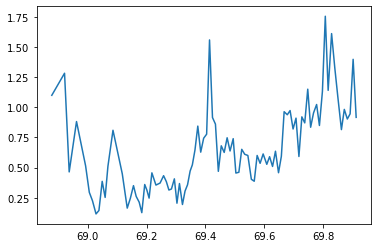

In [244]:
timesel=[np.datetime64('2018-12-02T12:12:00'),np.datetime64('2018-12-02T13:20:00')]
#print(timesel)
xds=ds1r.where((ds1r.time > timesel[0]) & (ds1r.time < timesel[1]) & (ds1r.lat >68) & (ds1r.lat < 71))
xds.to_netcdf('atl012.nc')
#xds = ds1r
plt.plot(xds.lat,xds.swh)
#lt.plot(xds.lon360,xds.lat)

In [ ]:
# THis doesnt work apparently because time is not a dimension
#test=swh.sel(time=slice(timesel),method='nearest')
# Figure out how to select based on coordinates rather than dimension or swap dimension
# or selection by index

In [185]:
# This is a utiltiy function to transformm coordinates from 
# cartopy coordinate systems
def coordXform(orig_crs, target_crs, x, y):
    return target_crs.transform_points( orig_crs, x, y )

In [228]:
# just for experimenting I figure out to set limits for a rotated map

nps = ccrs.NorthPolarStereo(central_longitude=180)
geo = ccrs.Geodetic()

lon_limits=np.array([180,180])
lat_limits=np.array([68,72])
llxy= coordXform(geo,nps,lon_limits,lat_limits)
print(llxy)
nlimit=llxy[:,0:2]
minx=nlimit[:,0].min()
maxx=nlimit[:,0].max()
miny=nlimit[:,1].min()
maxy=nlimit[:,1].max()
d0=1E5 # Offset from central longitude to the left
d1=1E6 # Offset from central Longitude to the right
mxmy=np.array([minx,miny,miny,maxy])
mxmy=np.array([minx-d0,maxx+d1,miny,maxy])
print(mxmy)

[[       0.         -2486689.93082888        0.        ]
 [       0.         -2026523.75817849        0.        ]]
[ -100000.          1000000.         -2486689.93082888 -2026523.75817849]


In [221]:
# now try cornber points 
#nps = ccrs.NorthPolarStereo(central_longitude=180)
#geo = ccrs.Geodetic()
#lon_limits=np.array([179,190])
#lat_limits=np.array([67,72])
#llxy= coordXform(geo,nps,lon_limits,lat_limits)
#nlimit=llxy[:,0:2]
#print("Nlimit:",nlimit)
# minx=nlimit[:,0].min()
# print(mxmy)

Nlimit: [[  -45422.15748428 -2602233.65946079]
 [  351902.15760643 -1995736.30871762]]


In [233]:
plt.figure(figsize=(10,10), dpi= 90)
# Make a new projection "NorthPolarStereo"


<Figure size 900x900 with 0 Axes>

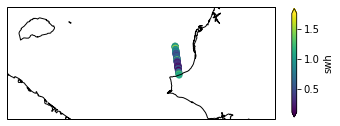

In [235]:
#cvar='seg_dist'
cvar='swh' # Significant wave height
da = xds[cvar]
ax = plt.axes(projection=nps)
plt.scatter(xds.lon, xds.lat, c=da, cmap='viridis', transform=ccrs.PlateCarree())
#plt.pcolormesh(lons, lats, tile_to_plot,
#               transform=ccrs.PlateCarree());
ax.coastlines(resolution="10m")
#ax.drawmeridians()
plt.colorbar(label=cvar, shrink=0.5, extend='both')
#llxy
# Limit the map to -60 degrees latitude and below.
ax.set_extent(mxmy,nps)

#ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

In [232]:
#print(ds1r.time)
swh=ds1r['swh']
#print(swh)
#time=swh.time
#time=None
#delta_time=swh.delta_time
print('---')
#print(swh.time>np.datetime64('2018-12-02T12:00:00'))
print('----')
#timesel=[np.datetime64('2018-12-02T12:00:00'),np.datetime64('2018-12-02T15:00:00')]
#print(timesel) test=sub.where((swh.time > timesel[0]) & (swh.time < timesel[1]))

#test=sub.where((swh.time > timesel[0]) & (swh.time < timesel[1]))
print(test)

#plt.plot(test.time,test.swh)
#te#st=swh.where((swh.time > np.datetime64('2018-12-02T12:00:00'))  & (swh.time> np.datetime64('2018-12-02T15:00:00')))
#test=swh.sel(time=slice('2018-12-02T12:00:00','2018-12-02T15:00:00'), method='nearest')
#test=swh.sel(time=slice(timesel),method='nearest')

---
----
<xarray.Dataset>
Dimensions:     (segs: 16317)
Coordinates:
    lon         (segs) float64 63.98 63.98 63.97 63.97 ... -30.48 -30.49 -30.49
    lat         (segs) float64 0.01223 0.03898 0.0708 ... -0.111 -0.07936 -0.048
    time        (segs) datetime64[ns] 2018-12-02T08:36:36 ... 2018-12-02T14:53:45
    delta_time  (segs) float64 2.898e+07 2.898e+07 2.898e+07 ... 2.9e+07 2.9e+07
    lon360      (segs) float64 63.98 63.98 63.97 63.97 ... 329.5 329.5 329.5
  * segs        (segs) int64 0 1 2 3 4 5 ... 16311 16312 16313 16314 16315 16316
Data variables:
    seg_dist    (segs) float64 nan nan nan nan ... 4.013e+07 4.013e+07 4.014e+07
    h           (segs) float32 nan nan nan nan ... 1.7426548 1.8067986 1.8932993
    swh         (segs) float32 nan nan nan nan ... 1.7166283 1.9239677 1.6527674
    length_seg  (segs) float64 nan nan nan nan ... 3.385e+03 3.668e+03 3.386e+03
